In [1]:
import pandas as pd
import numpy as np
import scipy.stats as si

In [2]:
def NORMSINV(x):
    NORMSINV = si.norm.ppf(x,0.0,1.0)
    return(NORMSINV)
RAND = np.random.standard_normal()

In [3]:
# XYZ
mean1 = 0.26 # Expected return (mean)
vol1 = 0.60 # Volatility (Std Dev)
# IBM
mean2 = 0.13 # Expected return (mean)
vol2 = 0.30 # Volatility (Std Dev)
# Correlation
corr = 0.2 # Correlation (rho)

# Minimum Variance Portfolio

In [4]:
MVP_Weight_XYZ = (vol2**2-corr*vol1*vol2)/(vol1**2+vol2**2-2*corr*vol1*vol2)
print("The Weight of XYZ in the Minimum Variance Portfolio is:", round((MVP_Weight_XYZ),2))

The Weight of XYZ in the Minimum Variance Portfolio is: 0.14


In [5]:
MVP_vol = np.sqrt((MVP_Weight_XYZ*vol1)**2+(1-MVP_Weight_XYZ)**2*vol2**2+2*MVP_Weight_XYZ*(1-MVP_Weight_XYZ)*vol1*vol2*corr)
print("The volatility of the Minimum Variance Portfolio is:", "{:.1%}".format(MVP_vol))

The volatility of the Minimum Variance Portfolio is: 28.7%


In [6]:
MVP_mean = MVP_Weight_XYZ*mean1+(1-MVP_Weight_XYZ)*mean2
print("The Expected return of the Minimum Variance Portfolio is:", "{:.1%}".format(MVP_mean))

The Expected return of the Minimum Variance Portfolio is: 14.9%


# Weight in XYZ

In [7]:
XYZ_Weight = np.linspace(-0.5,1.0,16)
print(XYZ_Weight)

[-0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8
  0.9  1. ]


In [8]:
VOL = []
for i in range(0,len(XYZ_Weight)):
    VOL.append(np.sqrt((XYZ_Weight[i]*vol1)**2+(1-XYZ_Weight[i])**2*vol2**2+2*XYZ_Weight[i]*(1-XYZ_Weight[i])*vol1*vol2*corr))

MEAN = []
for i in range(0,len(XYZ_Weight)):
    MEAN.append(XYZ_Weight[i]*mean1+(1-XYZ_Weight[i])*mean2)

In [9]:
df = pd.DataFrame({"Weight in XYZ": XYZ_Weight, "Volatility":VOL, "Expected return": MEAN})
df

,Weight in XYZ,Volatility,Expected return
0,-0.5,0.488365,0.065
1,-0.4,0.440091,0.078
2,-0.3,0.395500,0.091
3,-0.2,0.355978,0.104
4,-0.1,0.323388,0.117
5,0.0,0.300000,0.130
6,0.1,0.288062,0.143
7,0.2,0.288998,0.156
8,0.3,0.302688,0.169
9,0.4,0.327536,0.182


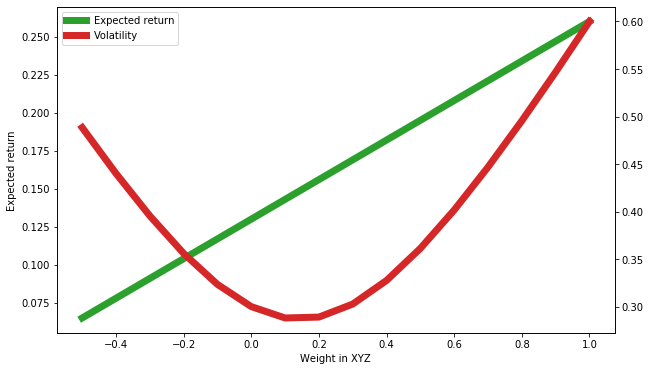

In [10]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_xlabel('Weight in XYZ')
ax1.set_ylabel('Expected return', color='black')
lns1 = ax1.plot(df['Weight in XYZ'], df['Expected return'], color=color, linewidth = 7.0, label = 'Expected return')
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
lns2 = ax2.plot(df['Weight in XYZ'], df['Volatility'], color=color, linewidth = 7.0, label = 'Volatility')
ax2.tick_params(axis='y', labelcolor='black')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.show()

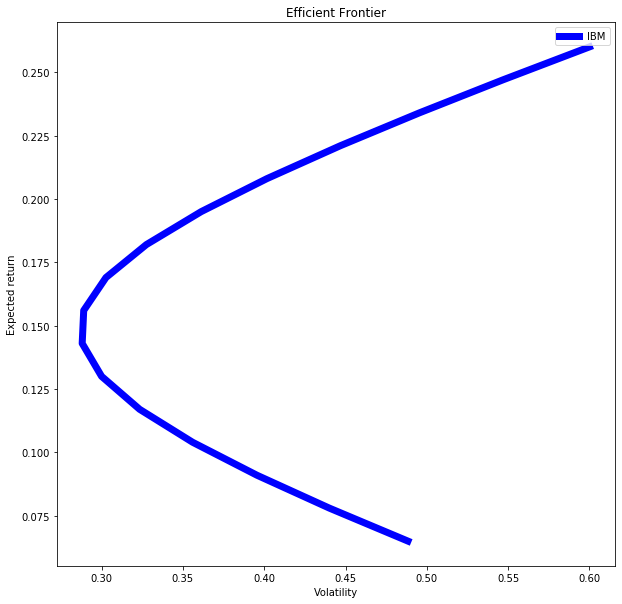

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ER = plt.plot(df['Volatility'], df['Expected return'], label='IBM', color = 'blue', linewidth = 7.0)
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Expected return')
plt.legend()
plt.show()